In [1]:
import pandas as pd

train = pd.read_csv('./nlp-getting-started/train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [2]:
text = train['text'].to_list()
text

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in California ',
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ',
 '#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires',
 '#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas',
 "I'm on top of the hill and I can see a fire in the woods...",
 "There's an emergency evacuation happening now in the building across the street",
 "I'm afraid that the tornado is coming to our area...",
 'Three people died from the heat wave so far',
 'Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA 

In [3]:
from sentence_transformers import SentenceTransformer, losses, SentenceTransformerTrainer, SentenceTransformerTrainingArguments
from datasets import load_dataset
from time import monotonic
import warnings
warnings.filterwarnings("ignore")

C:\Users\Alexey\AppData\Roaming\Python\Python311\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

components_list = [24, 64, 128, 384]

def print_pca(embeddings):
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 5), sharey=True)
    for i, components in enumerate(components_list):
        pca = PCA(components)
        pca.fit(embeddings)
        cum_variances = pca.explained_variance_ratio_.cumsum() * 100
        axs[i].set_title(f"{components} components -> {round(float(cum_variances[-1]), 3)}% coverage")
        axs[i].plot(cum_variances)
    fig.supxlabel("Number of components")
    fig.supylabel("Cumulative variances (percentage)")
    fig.tight_layout(rect=[0.01, 0, 1, 1])
    plt.show()

In [5]:
# tokenizer = AutoTokenizer.from_pretrained('distilbert/distilbert-base-uncased')
# model = AutoModel.from_pretrained("distilbert/distilbert-base-uncased")

# start = monotonic()
# encoded_input = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
# output = model(**encoded_input)
# print(f"Time for embeddings generation: {monotonic() - start} sec")
# print(f"Potential embeddings shape: {output[0][:, 0].shape}")
# print_pca(output[0][:, 0].detach().numpy())

In [6]:
# tokenizer = AutoTokenizer.from_pretrained('google-bert/bert-base-uncased')
# model = AutoModel.from_pretrained("google-bert/bert-base-uncased")

# start = monotonic()
# encoded_input = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
# output = model(**encoded_input)
# print(f"Time for embeddings generation: {monotonic() - start} sec")
# print(f"Potential embeddings shape: {output[0][:, 0].shape, output[1].shape}")
# print_pca(output[0][:, 0].detach().numpy())
# print_pca(output[1].detach().numpy())

In [7]:
# tokenizer = AutoTokenizer.from_pretrained('google-bert/bert-large-uncased')
# model = AutoModel.from_pretrained("google-bert/bert-large-uncased")

# start = monotonic()
# encoded_input = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
# output = model(**encoded_input)
# print(f"Time for embeddings generation: {monotonic() - start} sec")
# print(f"Potential embeddings shape: {output[0][:, 0].shape, output[1].shape}")
# print_pca(output[0][:, 0].detach().numpy())
# print_pca(output[1].detach().numpy())

In [8]:
# tokenizer = AutoTokenizer.from_pretrained('olm/olm-roberta-base-dec-2022')
# model = AutoModel.from_pretrained("olm/olm-roberta-base-dec-2022")

# start = monotonic()
# encoded_input = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
# output = model(**encoded_input)
# print(f"Time for embeddings generation: {monotonic() - start} sec")
# print(f"Potential embeddings shape: {output[0][:, 0].shape, output[1].shape}")
# print_pca(output[0][:, 0].detach().numpy())
# print_pca(output[1].detach().numpy())

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

Time for embeddings generation: 897.3279999999995 sec
Potential embeddings shape: (7613, 1024)


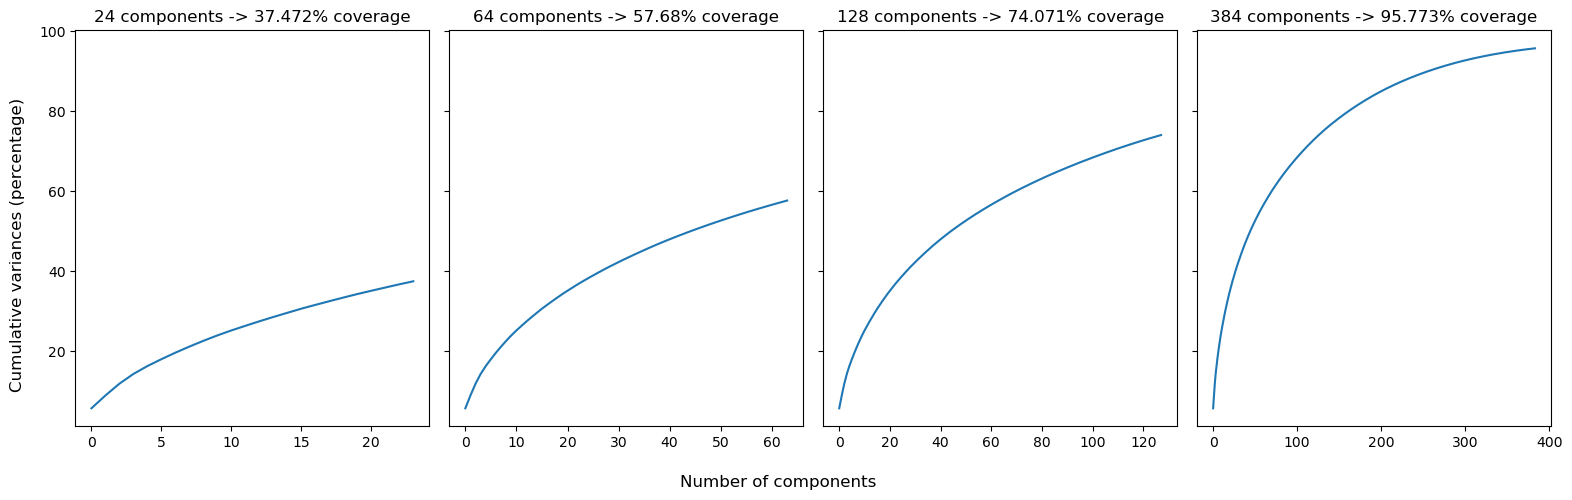

In [9]:
model = SentenceTransformer('all-roberta-large-v1') #1360 mb

start = monotonic()
embeddings = model.encode(text)
print(f"Time for embeddings generation: {monotonic() - start} sec")
print(f"Potential embeddings shape: {len(embeddings), len(embeddings[0])}")
print_pca(embeddings)

modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.87k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.15M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.15M [00:00<?, ?B/s]

Time for embeddings generation: 975.2970000000005 sec
Potential embeddings shape: (7613, 768)


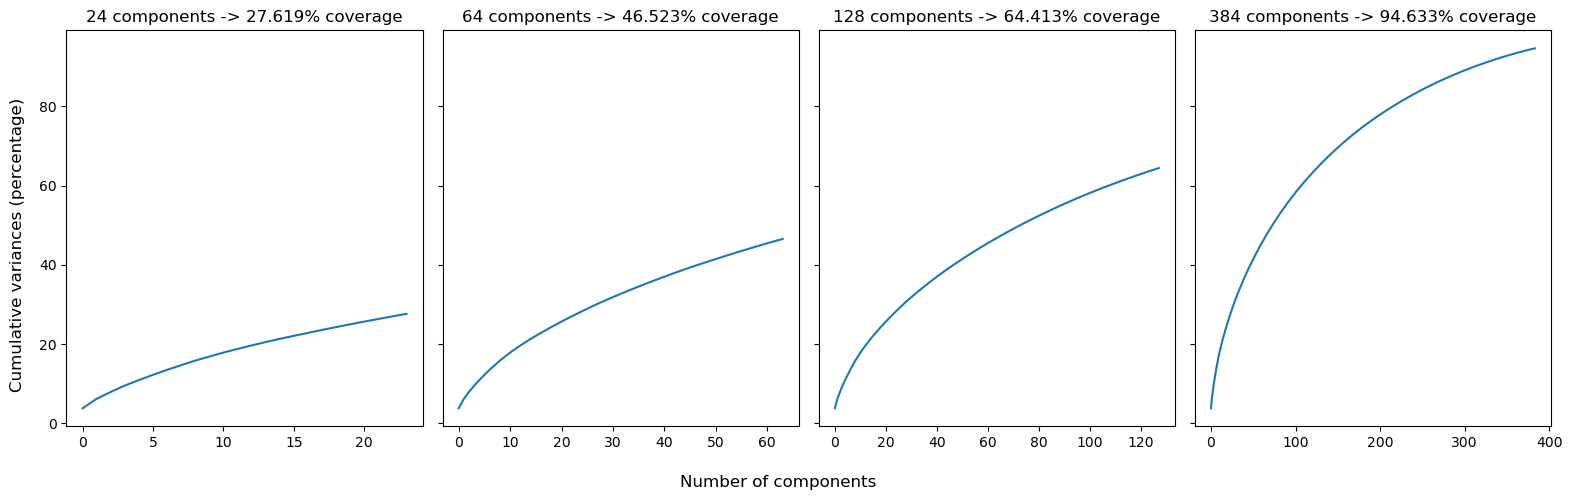

In [10]:
model = SentenceTransformer('gtr-t5-large') #640 mb

start = monotonic()
embeddings = model.encode(text)
print(f"Time for embeddings generation: {monotonic() - start} sec")
print(f"Potential embeddings shape: {embeddings.shape}")
print_pca(embeddings)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/9.96k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/591 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Time for embeddings generation: 268.1869999999999 sec
Potential embeddings shape: (7613, 768)


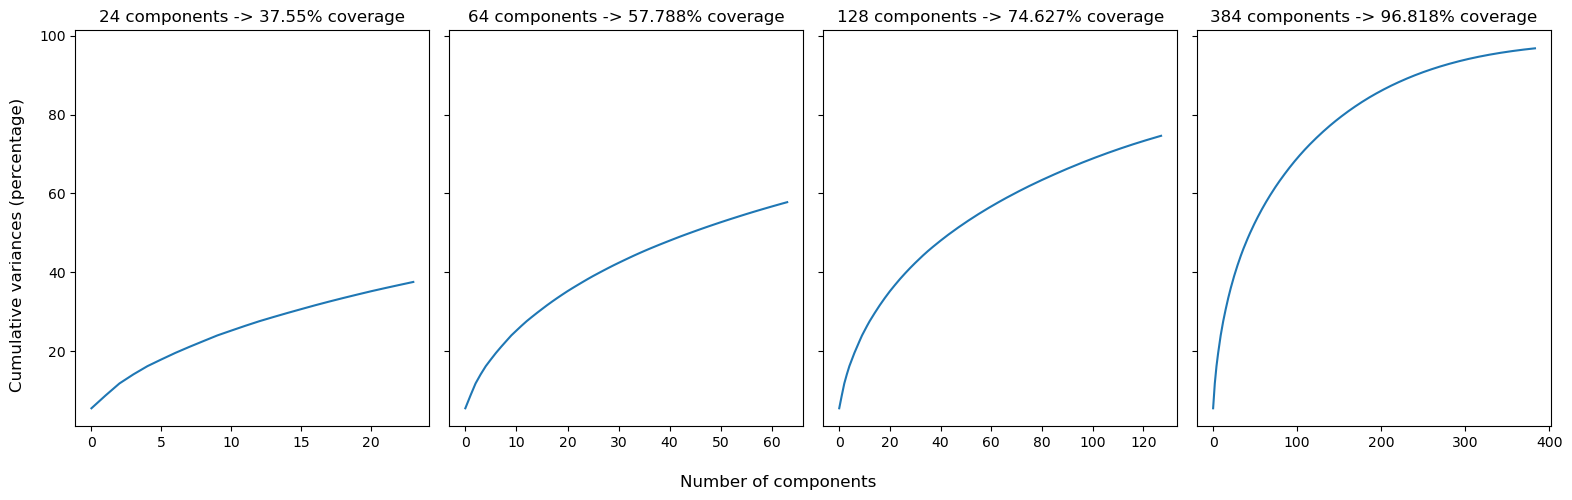

In [11]:
model = SentenceTransformer('all-mpnet-base-v1') #420 mb

start = monotonic()
embeddings = model.encode(text)
print(f"Time for embeddings generation: {monotonic() - start} sec")
print(f"Potential embeddings shape: {embeddings.shape}")
print_pca(embeddings)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.0k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/573 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/352 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Time for embeddings generation: 78.51599999999962 sec
Potential embeddings shape: (7613, 384)


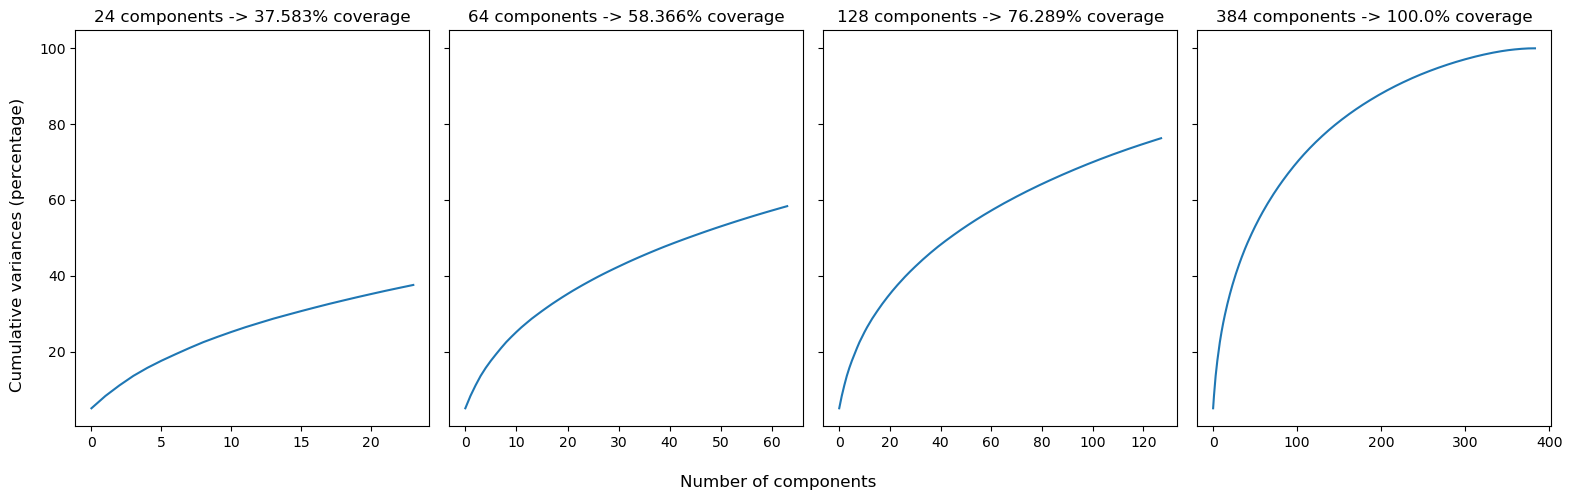

In [12]:
model = SentenceTransformer('all-MiniLM-L12-v1') #120 mb

start = monotonic()
embeddings = model.encode(text)
print(f"Time for embeddings generation: {monotonic() - start} sec")
print(f"Potential embeddings shape: {embeddings.shape}")
print_pca(embeddings)

Time for embeddings generation: 39.32800000000043 sec
Potential embeddings shape: (7613, 384)


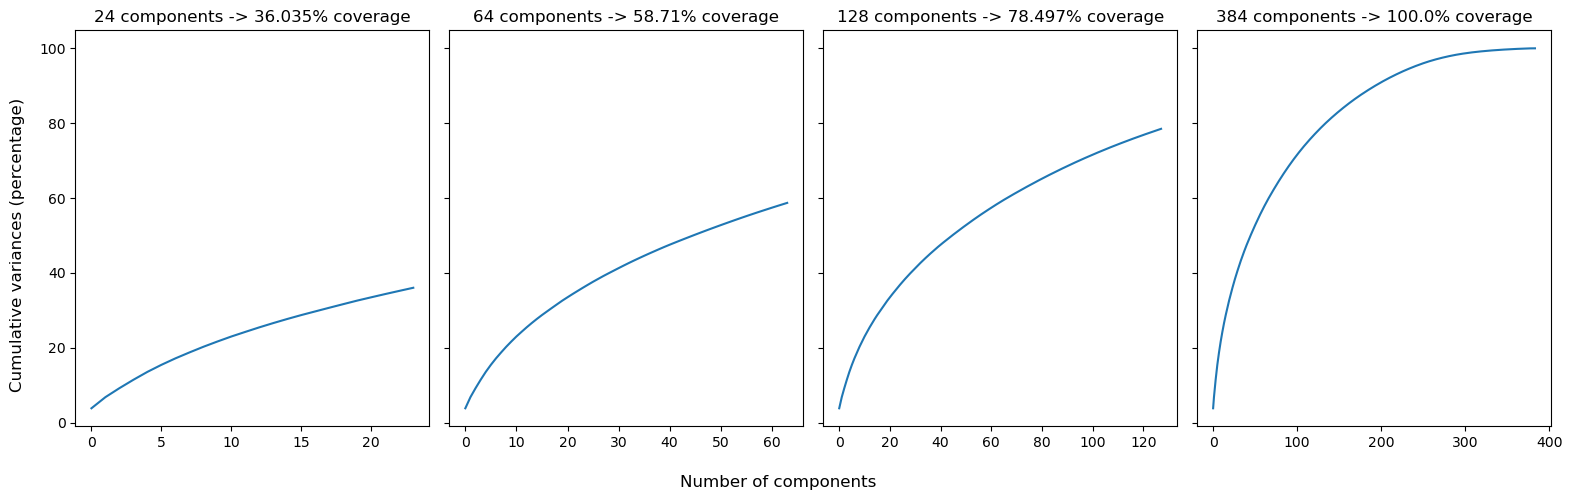

In [13]:
model = SentenceTransformer('all-MiniLM-L6-v2') #80 mb

start = monotonic()
embeddings = model.encode(text)
print(f"Time for embeddings generation: {monotonic() - start} sec")
print(f"Potential embeddings shape: {embeddings.shape}")
print_pca(embeddings)

In [1]:
from sentence_transformers import SentenceTransformer, losses, SentenceTransformerTrainer, SentenceTransformerTrainingArguments
from datasets import load_dataset
from time import monotonic
import warnings
warnings.filterwarnings("ignore")

C:\Users\Alexey\AppData\Roaming\Python\Python311\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
from sentence_transformers.evaluation import SentenceEvaluator  
from sklearn.metrics import f1_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

class F1ScoreEvaluator(SentenceEvaluator):  
    def __init__(self, average='macro'):  
        super(F1ScoreEvaluator, self).__init__() 
        train = pd.read_csv('./nlp-getting-started/train.csv')
        self.sentences = train['text'].to_list()
        self.target = train['target'].to_list()  
        self.average = average

    def __call__(self, model):
        embeddings = model.encode(self.sentences)
        X_train, X_test, y_train, y_test = train_test_split(embeddings, self.target, test_size=0.2)
        LR = LogisticRegression()
        LR.fit(X_train,y_train)
        y_pred = LR.predict(X_test)
        return f1_score(y_test, y_pred, average=self.average)

In [3]:
model = SentenceTransformer('./models/all-MiniLM-L6-v2/final')
train_dataset = load_dataset("venetis/disaster_tweets").remove_columns(['id', 'keyword', 'location']).rename_column('target', 'label')
loss = losses.BatchAllTripletLoss(model)
dev_evaluator = F1ScoreEvaluator()
dev_evaluator(model)

args = SentenceTransformerTrainingArguments(
    output_dir="./models/all-MiniLM-L6-v2",
    num_train_epochs=1000,
    per_device_train_batch_size=256,
    learning_rate=1e-5,
    warmup_ratio=0.1,
    fp16=True,  
    bf16=False,
    eval_strategy="steps",
    eval_steps=300,
    save_strategy="steps",
    save_steps=10000,
    logging_steps=300,
)

trainer = SentenceTransformerTrainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    loss=loss,
    evaluator=dev_evaluator,
)
trainer.train()
model.save_pretrained("./models/all-MiniLM-L6-v2/final")

Step,Training Loss,Validation Loss,Evaluator
300,4.192600,No log,0.848542
600,4.155400,No log,0.861791
900,4.093200,No log,0.853472
1200,4.029300,No log,0.856521
1500,3.973700,No log,0.884430
1800,3.920500,No log,0.893417
2100,3.872300,No log,0.887743
2400,3.829500,No log,0.905181
2700,3.797700,No log,0.908209
3000,3.753700,No log,0.907082


Computing widget examples:   0%|          | 0/1 [00:00<?, ?example/s]

In [7]:
test = pd.read_csv('./nlp-getting-started/test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [27]:
#model = SentenceTransformer('./models/all-MiniLM-L6-v2/final')
model = SentenceTransformer('all-MiniLM-L6-v2')
train = pd.read_csv('./nlp-getting-started/train.csv')
test = pd.read_csv('./nlp-getting-started/test.csv')
embeddings = model.encode(train['text'].to_list())
LR = LogisticRegression()
print(embeddings.shape, len(train['target'].to_list()))
LR.fit(embeddings, train['target'].to_list())
test_embeddings = model.encode(test['text'].to_list())
target = LR.predict(test_embeddings)
print(test_embeddings.shape, len(target))
test['target'] = pd.Series(data=target)
test.head()

(7613, 384) 7613
(3263, 384) 3263


,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,0
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1


In [28]:
test.drop(columns=['keyword', 'location', 'text']).to_csv('submission.csv', index=False)